[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding
This notebook runs two different IPP... experiments.

The first one, implemented in `image_IPP.py` is a simple IPP... video codec without RDO (all macro-blocks are motion compensated as P-type blocks). The lossy image compressor is MP4 used in intra mode.

`image_IPP_adaptive.py`

The second one, implemented in `image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 

Finally, the RD curves are compared to MP4 (intra-mode).

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Sequence to compress

In [2]:
#sequence = "bus"
sequence = "akiyo"

!../sequences/$sequence/runme.sh

### Number of frames to compress

In [3]:
N_frames = 5 # Min val 3

## Testing `image_IPP`

### Select `image_IPP` in `RD_curve.py`

In [4]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [5]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


### We use MP4 and therefore, no previous spatial transform is used
MP4 uses the DCT.

In [6]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [7]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


### Select the color transform

In [8]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [9]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


### Run the codec

In [10]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

rm: no se puede borrar '/tmp/*.png': No existe el archivo o el directorio
akiyo_cif.y4m exists.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --en

In [11]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 134 -123 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=198 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 63 -58 int16
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751511037349701 -0.4026305377483368
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 115 -83 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=218 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 63 -53 i

[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 30
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 125 -145 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 112 -112 int16
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 33
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 132 -121 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[i

In [12]:
!grep BPP /tmp/output_image_IPP | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [13]:
!cat /tmp/image_IPP.txt

0.1121790824915825	40.898731455176765
0.0870580808080808	47.93592960858586
0.07012310606060607	56.87987492108586
0.05833859427609427	69.76688105008417
0.05063131313131313	86.63204834806398
0.044134048821548824	114.72044928451177
0.039867424242424246	164.29030013678454


In [14]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`

### Select `image_IPP_adaptive` in `RD_curve.py`

In [38]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [39]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [40]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [41]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [42]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [43]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [44]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enabl

In [45]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_adaptive >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 134 -123 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=198 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 63 -58 int16
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 127 -67 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=160 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 50 -24 int16
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751511037349701 -0.4026305377483368
[image_IPP.py:79 encode()] USED flow

[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=201 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 49 -38 int16
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.2449876368045807 -0.2870011329650879
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 27
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 133 -111 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=237 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 62 -57 int16
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 27
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 122 -64 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=237 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 29 -27 int16
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()]

[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 33
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 111 -77 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 112 -77 int16
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.30398550629615784 -0.3060075640678406
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 36
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 132 -113 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[ima

In [46]:
!grep BPP /tmp/output_image_IPP_adaptive | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [47]:
!cat /tmp/image_IPP_adaptive.txt

0.06235795454545455	70.88796164772728
0.05644465488215488	72.44996054292929
0.05376157407407407	76.19566432554714
0.051878156565656565	78.58898884680134
0.04849010942760943	93.48289009890573
0.04542824074074074	117.91103482744106
0.04458122895622896	168.93492674137207


In [48]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` in `RD_curve.py`

In [49]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as codec\n/\nimport MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [50]:
!grep import RD_curve.py

#import debug
import config
import distortion
import image_3 as frame
#import image_interpolated_IPP as codec
#import image_IPP as codec
#import image_IPP_adaptive as codec
#import image_IPP_quantized_prediction as codec
#import image_IPP_quantized_residue as codec
import MP4 as codec
#import IPP_compressor as codec
import logging
import argparse


In [51]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [52]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [53]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [54]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [55]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enabl

In [56]:
!python RD_curve.py --N_frames=$N_frames 1> >(tee /tmp/output_MP4 >&1) | grep BPP | grep Average | cat -n

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

frame=    5 fps=0.0 q=29.0 Lsize=       8kB time=00:00:00.16 bitrate= 390.8kbits/s speed=1.99x    
video:7kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 12.341954%
[libx264 @ 0x5558801008c0] frame I:1     Avg QP:25.37  size:  6078
[libx264 @ 0x5558801008c0] frame P:4     Avg QP:28.72  size:    65
[libx264 @ 0x5558801008c0] mb I  I16..4: 26.5%  0.0% 73.5%
[libx264 @ 0x5558801008c0] mb P  I16..4:  0.1%  0.0%  0.0%  P16..4:  2.5%  1.0%  0.8%  0.0%  0.0%    skip:95.7%
[libx264 @ 0x5558801008c0] coded y,u,v intra: 58.2% 22.3% 18.0% inter: 0.1% 0.0% 0.0%
[libx264 @ 0x5558801008c0] i16 v,h,dc,p: 38% 30% 16% 16%
[libx264 @ 0x5558801008c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 37% 18% 14%  5%  5%  7%  4%  6%  4%
[libx264 @ 0x5558801008c0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x5558801008c0] ref P L0: 85.1% 11.9%  1.5%  1.5%
[libx264 @ 0x5558801008c0] kb/s:253.48
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ub

frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed=2.42x    
video:545kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-li

[libx264 @ 0x56221852f8c0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2
[libx264 @ 0x56221852f8c0] profile High 4:4:4 Predictive, level 1.3, 4:4:4 8-bit
[libx264 @ 0x56221852f8c0] 264 - core 152 r2854 e9a5903 - H.264/MPEG-4 AVC codec - Copyleft 2003-2017 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x1:0x111 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=0 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=1 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=0 weightp=2 keyint=5 keyint_min=1 scenecut=40 intra_refresh=0 rc_lookahead=5 rc=crf mbtree=1 crf=33.0 qcomp=0.60 qpmin=0 qpmax=69 qpstep=4 ip_ratio=1.40 aq=1:1.00
Output #0, mp4, to '/tmp/output.mp4':
  Metadata:
    encoder         : Lavf57.83.100
    Stream #0:0: Video: h264 (libx264) (avc1 / 0x31637661), yuv444p, 352x288 [SAR 128:117 DAR 1408:1053], q=-1--1, 25 fps, 12800 tb

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed= 3.4x    
video:450kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
     1	Q_step: 21 BPP: 0.0537773569023569 KBPS: 490.656 Average AMSE: 10.598400673400674
     2	Q_step: 24 BPP: 0.04113531144781145 KBPS: 375.312 Average AMSE: 15.11699350273569
     3	Q_step: 27 BPP: 0.03344381313131313 KBPS: 305.136 Average AMSE: 21.333053188131316
     4	Q_step: 30 BPP: 0.027304292929292928 KBPS: 249.12 Average AMSE: 30.202552872474747
     5	Q_step: 33 BPP: 0.023290193602693604 KBPS: 212.496 Average AMSE: 43.22038023463804
     6	Q_step: 36 BPP: 0.02008627946127946 KBPS: 183.264 Average AMSE: 61.83464001999158
     7	Q_step: 39 BPP: 0.0172979797979798 KBPS: 157.824 Average AMSE: 86.94903001367845


In [57]:
!grep BPP /tmp/output_MP4 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [58]:
!cat /tmp/MP4.txt

0.0537773569023569	10.598400673400674
0.04113531144781145	15.11699350273569
0.03344381313131313	21.333053188131316
0.027304292929292928	30.202552872474747
0.023290193602693604	43.22038023463804
0.02008627946127946	61.83464001999158
0.0172979797979798	86.94903001367845


In [59]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

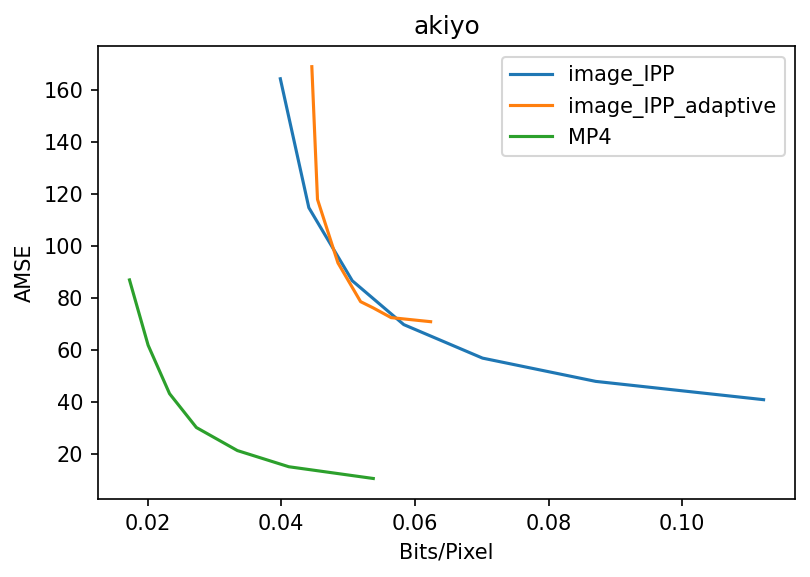

In [60]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

## Testing `image_IPP_quantized_residue`

### Select `image_IPP_quantized_residue` in `RD_curve.py`

In [38]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [39]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [40]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [41]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [42]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [43]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [ ]:
# You can see in real-time the output by running "tail -f /tmp/output"
!rm /tmp/*.png
!../sequences/$sequence/runme.sh
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_quantized_residue >&1) | grep BPP | grep Average | cat -n

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [ ]:
!grep BPP /tmp/output_image_IPP_quantized_residue | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [ ]:
!cat /tmp/image_IPP_quantized_residue.txt

In [ ]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()